### Introdução
Este conjunto de dados contém informação sobre mais de 10.000 filmes da Base de Dados de Filmes, incluindo orçamento, receitas, elenco, gênero, data de lançamento e classificações dos utilizadores.

Há duas questões principais que tenciono explorar ao longo do relatório:

Que gêneros são mais populares de ano para ano?
Que tipos de propriedades (orçamento, tempo de execução, gênero) estão associados aos filmes que têm receitas elevadas?


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Banco de dados 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Propriedades Gerais

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Algumas características têm valores em falta:

imdb_id
elenco
página inicial
director
slogan
palavras-chave
visão geral
gêneros
empresas_de_produção

Não se faz necessário preenchê-los. Posso apagar completamente algumas destas colunas do conjunto de dados, uma vez que não são relevantes para a analise realizada.

In [4]:
sum(df.duplicated())

1

Há 1 linha em duplicado no conjunto de dados

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Há 2039 valores únicos de gênero no conjunto de dados.

In [6]:
df.mean()

C:\Users\victoria.costa\AppData\Local\Temp\ipykernel_12616\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id              6.606418e+04
popularity      6.464410e-01
budget          1.462570e+07
revenue         3.982332e+07
runtime         1.020709e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      1.755104e+07
revenue_adj     5.136436e+07
dtype: float64

A popularidade média no conjunto de dados é 6.464410

O budget_adj médio no conjunto de dados é 1.755104

A média de revenue_adj no conjunto de dados é 5.136436

O runtime de execução no conjunto de dados é de 1.020709

### Data Cleaning

In [7]:
# Excluir Colunas
df.drop(['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

# Confirmar alterações
df.head(1)

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


In [8]:
# Ver a contagem de valores em falta para cada característica.
df.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
# Apagar linhas com quaisquer valores nulos.
df.dropna(inplace=True)

# Verificar se alguma das colunas tem valores nulos -  imprimir Falso se sim..
df.isnull().sum().any()

False

In [10]:
budget_adj_mean = df['budget_adj'].mean()
revenue_adj_mean = df['revenue_adj'].mean()
runtime_mean = df['runtime'].mean()

df['budget_adj'] = df['budget_adj'].replace(to_replace=0, value=budget_adj_mean)
df['revenue_adj'] = df['revenue_adj'].replace(to_replace=0, value=revenue_adj_mean)
df['runtime'] = df['runtime'].replace(to_replace=0, value=runtime_mean)

In [11]:
# Converter as colunas budget_adj e revenue_adj para int.
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

# Confirmar alteração dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   original_title  10843 non-null  object 
 3   runtime         10843 non-null  float64
 4   genres          10843 non-null  object 
 5   release_year    10843 non-null  int64  
 6   budget_adj      10843 non-null  int32  
 7   revenue_adj     10843 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 677.7+ KB


In [12]:
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [13]:
# Cheack que todas as linhas de gêneros originais com "|" desapareceram
df['genres'].nunique()

20

In [14]:
df.head()

,id,popularity,original_title,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124.0,Action,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,120.0,Action,2015,137999939,348161292
2,262500,13.112507,Insurgent,119.0,Adventure,2015,101199955,271619025
3,140607,11.173104,Star Wars: The Force Awakens,136.0,Action,2015,183999919,1902723129
4,168259,9.335014,Furious 7,137.0,Action,2015,174799923,1385748801


### Análise de dados exploratórias
Que gêneros são mais populares de ano para ano?

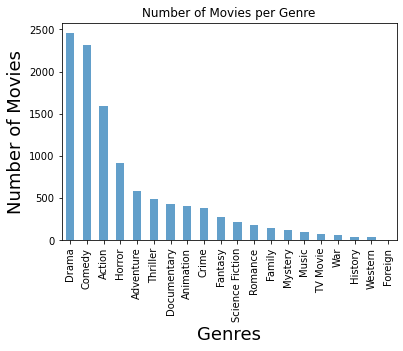

In [15]:
df['genres'].value_counts().plot(kind='bar', title='Number of Movies per Genre', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18);

Este gráfico mostra as contagens para todos os valores na coluna dos gêneros.

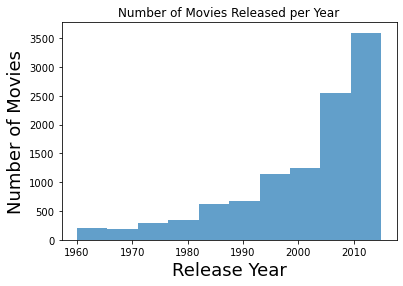

In [16]:
df['release_year'].plot(kind='hist', title='Number of Movies Released per Year', alpha=.7)
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18);

This histogram shows the distribution of the release year of all the movies in the dataset.

In [17]:
df_mean_pop = df.groupby( [ 'release_year', 'genres' ])['popularity'].mean().to_frame(name = 'popularity').reset_index()
df_mean_pop.head(n=17)

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.304992
2,1960,Comedy,0.392067
3,1960,Crime,0.269428
4,1960,Drama,0.687575
5,1960,Horror,0.254964
6,1960,Thriller,0.456165
7,1961,Action,0.540904
8,1961,Adventure,1.394596
9,1961,Comedy,0.431700


Isto mostra cada ano de lançamento no conjunto de dados, juntamente com os gêneros dos filmes lançados em cada ano com a sua pontuação de popularidade correspondente.

In [18]:
## Cria um quadro de dados com o gênero mais popular por ano de 1960 a 2015
idx = df_mean_pop.groupby(['release_year'])['popularity'].transform(max) == df_mean_pop['popularity']
df_year_genre = df_mean_pop[idx]
df_year_genre.head(n=20)

,release_year,genres,popularity
4,1960,Drama,0.687575
8,1961,Adventure,1.394596
18,1962,Adventure,1.283631
29,1963,Animation,2.180410
36,1964,Adventure,0.736431
47,1965,Adventure,1.121328
57,1966,Animation,0.740509
76,1967,Family,2.550704
92,1968,Science Fiction,2.088194
101,1969,History,1.357317


genres
Action       0.590724
Adventure    0.304992
Comedy       0.392067
Crime        0.269428
Drama        0.687575
Horror       0.254964
Thriller     0.456165
Name: popularity, dtype: float64


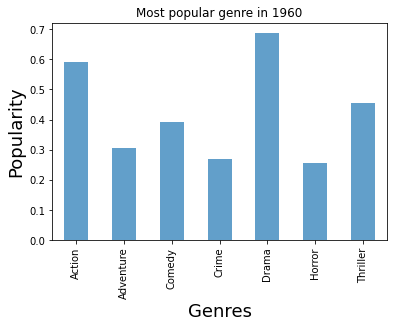

In [19]:
# Selecção de todos os filmes lançados em 1960
df_1960 = df[df['release_year'] == 1960]

# Encontrar a popularidade média de cada gênero..
print(df_1960.groupby('genres')['popularity'].mean())

# Traçar um gráfico para mostrar o género mais popular nesse ano.
df_1960.groupby('genres')['popularity'].mean().plot(kind='bar', title='Most popular genre in 1960', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

Este gráfico mostra os gêneros lançados em 1960 juntamente com as suas pontuações médias de popularidade. Drama é claramente o género mais popular desse ano.

14
Adventure          18
Science Fiction     8
Animation           6
Romance             4
Drama               3
Family              3
Music               3
Fantasy             3
Mystery             2
Western             2
History             1
Crime               1
Horror              1
Thriller            1
Name: genres, dtype: int64


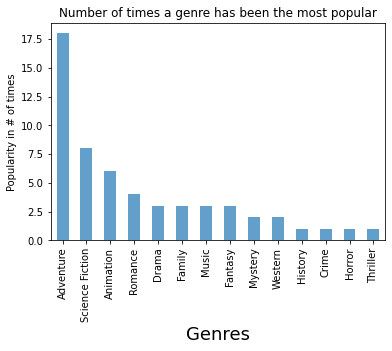

In [20]:
print(df_year_genre['genres'].nunique())
print(df_year_genre['genres'].value_counts())
df_year_genre['genres'].value_counts().plot(kind='bar', title='Number of times a genre has been the most popular', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Popularity in # of times');

Este enredo mostra o número de vezes que um determinado gênero tem sido o gênero mais popular do ano. A aventura é o gênero que tem sido o mais popular, o maior número de vezes.

### Que tipos de propriedades (orçamento, tempo de execução, gênero) estão associadas aos filmes que têm receitas elevadas?

In [21]:
# Cálculo de estatísticas para todos os parâmetros
print(df['genres'].nunique())
df.describe()

20


,id,popularity,runtime,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,102.420098,2001.315595,2.679198e+07,7.818171e+07
std,91977.394803,1.000986,30.827363,12.813298,3.053106e+07,1.348792e+08
min,5.000000,0.000065,2.000000,1960.000000,0.000000e+00,-2.147484e+09
25%,10589.500000,0.208253,90.000000,1995.000000,1.758827e+07,5.147332e+07
50%,20558.000000,0.384555,99.000000,2006.000000,1.758827e+07,5.147332e+07
75%,75182.000000,0.715349,111.000000,2011.000000,2.093530e+07,5.147332e+07
max,417859.000000,32.985763,900.000000,2015.000000,4.250000e+08,1.907006e+09


Para que possamos encontrar alguns limites para os parâmetros:

O tempo médio de execução é 102, o máximo é 900, e o mínimo é 2. O orçamento médio_adj é 26796020, o máximo é 425000000, e o mínimo é 1000000. A receita média_adj é 79932830, o máximo é 2827124000, e o mínimo é 2000000. A base de dados contém vinte valores únicos para os gêneros.

C:\Users\victoria.costa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:69: RuntimeWarning: overflow encountered in long_scalars
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2


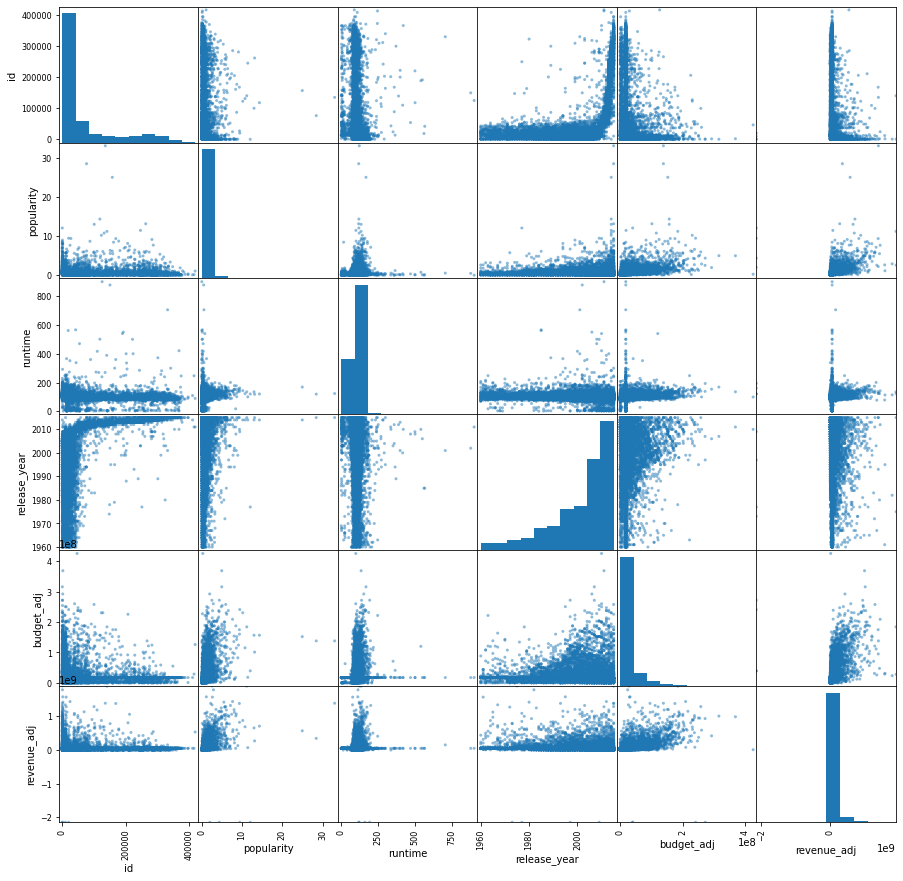

In [22]:

pd.plotting.scatter_matrix(df, figsize=(15, 15));

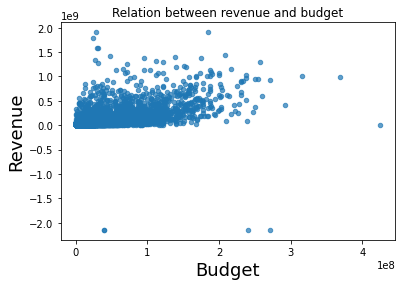

In [23]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', title='Relation between revenue and budget', alpha=.7)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Este enredo mostra uma tendência realmente pequena que pode sugerir que filmes com orçamentos ligeiramente superiores (entre 100000000 e 180000000) geram mais receitas. No entanto, a tendência é realmente fraca e nenhuma causa pode ser confirmada.

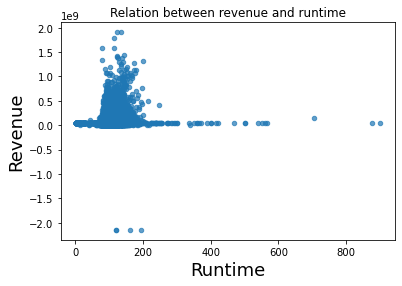

In [24]:
df.plot(x='runtime', y='revenue_adj', kind='scatter', title='Relation between revenue and runtime', alpha=.7);
plt.xlabel('Runtime', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Este gráfico mostra um claro pico entre os tempos de corrida 80 e 200. Isto sugere que os filmes de alta grossura mantêm os seus tempos de corrida entre esses dois limites.

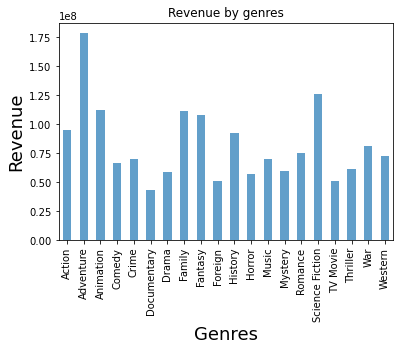

In [25]:
df.groupby('genres')['revenue_adj'].mean().plot(kind='bar', title='Revenue by genres', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

### Conclusões
#### Quais os gêneros que são mais populares de ano para ano?
A resposta a esta pergunta varia obviamente de ano para ano.

O seguinte quadro de dados mostra claramente o gênero mais popular de cada ano no conjunto de dados

In [26]:
df_year_genre

,release_year,genres,popularity
4,1960,Drama,0.687575
8,1961,Adventure,1.394596
18,1962,Adventure,1.283631
29,1963,Animation,2.180410
36,1964,Adventure,0.736431
47,1965,Adventure,1.121328
57,1966,Animation,0.740509
76,1967,Family,2.550704
92,1968,Science Fiction,2.088194
101,1969,History,1.357317


Com esta experiência posso dizer que o filme mais popular do ano varia muito e que não há realmente uma tendência, qualquer gênero pode eventualmente tornar-se o mais popular do ano.
Existem algumas fraquezas nos dados que podem ter influenciado os resultados:
A pontuação de popularidade é calculada utilizando votos e opiniões do site, o que limita os resultados, já que representa apenas as preferências de um pequeno grupo de pessoas.
Em muitos casos (especialmente com filmes antigos), as pontuações de popularidade não refletem o gosto das pessoas que experimentaram a data de lançamento do filme.
Muitos gêneros foram listados para um filme. Ao manter apenas o primeiro gênero listado, os resultados não mostram a natureza diversa dos filmes que normalmente incorporam muitos gêneros.
Os resultados não provam qual é o gênero mais popular de cada ano, mas conseguem dar uma dica da preferência de gêneros favoritos dos usuários do site.


### Que tipos de propriedades (orçamento, tempo de execução, gênero) estão associadas aos filmes que têm receitas elevadas?

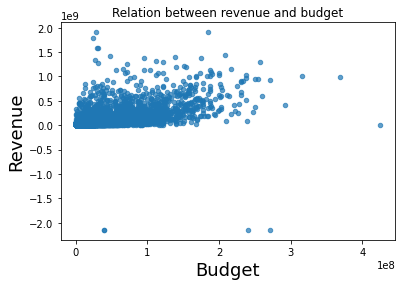

In [27]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', title='Relation between revenue and budget', alpha=.7)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Há uma pequena tendência que pode sugerir que filmes com orçamentos ligeiramente superiores (entre 100000000 e 180000000, o que ainda está abaixo da média) geram mais receitas. Mas podemos ver que há muitos filmes com orçamentos relativamente baixos que têm receitas elevadas.

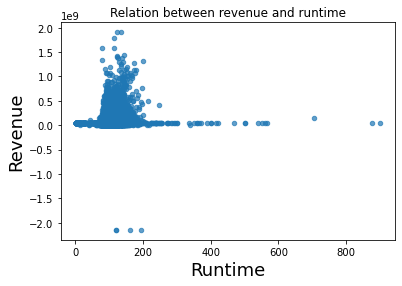

In [28]:
df.plot(x='runtime', y='revenue_adj', kind='scatter', title='Relation between revenue and runtime', alpha=.7);
plt.xlabel('Runtime', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Existe um pico nas receitas de filmes entre 80 e 200. Isto sugere que os filmes de grande bilheteria mantêm os seus tempos de execução entre esses dois limites.

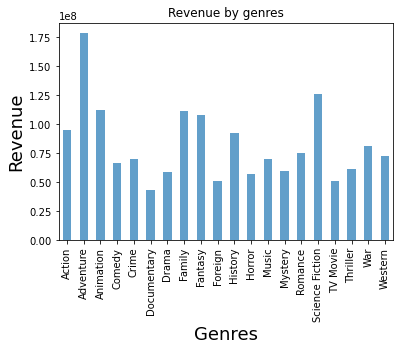

In [29]:
df.groupby('genres')['revenue_adj'].mean().plot(kind='bar', title='Revenue by genres', alpha=.7)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Em média, os filmes de Aventura geram a maior receita com a ficção-científica como um segundo distante.

Podemos aprender o seguinte com esta experiência:

Os orçamentos dos filmes variam normalmente em torno das dezenas de milhões. Mas um filme com receitas elevadas pode gerar 10x esse investimento.
Um filme com um investimento relativamente pequeno pode gerar mais receita.
O tempo de execução pode influenciar o quanto as pessoas gostam de um filme, afetando assim as suas receitas.
Relativamente ao orçamento, tempo de execução e gênero, não existe realmente uma fórmula para fazer um filme com receitas elevadas.

Contudo existem limitações sobre o estudo:

Alguns dos valores para o budget_adj, revenue_adj e runtime eram originalmente 0: foram ajustados para não interferirem na média.
A causa não pode ser provada para qualquer uma das variáveis. Há uma forte correlação entre tempo de execução e receita.
Muitos gêneros foram listados para um filme. Ao manter apenas o primeiro gênero listado, os resultados não mostram a natureza diversa dos filmes que normalmente incorporam muitos gêneros .
A receita por gênero foi calculada utilizando a receita média para cada gênero.